# APPLE STOCK PRICE PREDICTION USING LONG SHORT TERM MEMORY (LSTM)

#### OBJECTIVE: PREDICTING STOCK PRICES OF APPLE FOR NEXT 15 DAYS IN FUTURE

#### <br>Approach</br>
 <br>Step 1: Collect Apple Stock Price Data till date from Tiingo (which is an API which provides free accessible stock price data)</br>
<br>Link of Tiingo : <https://api.tiingo.com/></br>
 <br>Steps: To get data from Tiingo API</br>
<br>Login via your account and you will be generated a unique key through which you can download the stock price </br>

##### TASK:
<br>1. Collected Apple Stock Price Data till date and split that stock price data into 70 % of data in training data which trains for stock prices by considering past 60 days stock price values.</br>
<br>2. Test data will take from 30 % of data of stocks till date and also it will take past 60 days stock price values as we are using 60 days stock price past values for predicting next day stock price values.</br>
<br>3. Plot the graph of actual stock price values and predicted stock price(of test data) to check how it is predicting.</br>
<br>4. Find out stock price values of future 15 days based on past 60 days stock price value. </br>
<br>5. Plot the graph of future 15 days stock price values from date and conclusion.</br>

#### Importing libraries

<br>pandas_datareader is subpackage which allows to create dataframe through various Internet data sources</br>

In [1]:
import pandas_datareader as pdr
import pandas as pd
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
key="a429af8eb4c2814846898988e2274003d013fba9"

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


#### Getting Apple Stock Price Data 

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

#### Saving the Stock Price Data as csv file

In [3]:
df.to_csv('C:/Users/shwer/data/AAPL.csv')

##### Reading the csv file

In [4]:
df=pd.read_csv('C:/Users/shwer/data/AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-11 00:00:00+00:00,128.59,130.18,128.475,129.180,35390887,118.498694,119.963916,118.392719,119.042393,35390887,0.0,1.0
1,AAPL,2015-06-12 00:00:00+00:00,127.17,128.33,127.110,128.185,36886246,117.190131,118.259098,117.134840,118.125477,36886246,0.0,1.0
2,AAPL,2015-06-15 00:00:00+00:00,126.92,127.24,125.710,126.100,43988946,116.959750,117.254638,115.844707,116.204101,43988946,0.0,1.0
3,AAPL,2015-06-16 00:00:00+00:00,127.60,127.85,126.370,127.030,31494131,117.586386,117.816767,116.452912,117.061118,31494131,0.0,1.0
4,AAPL,2015-06-17 00:00:00+00:00,127.30,127.88,126.740,127.720,32918071,117.309929,117.844413,116.793876,117.696969,32918071,0.0,1.0


In [5]:
df.shape

(1257, 14)

##### Getting 2d array of all rows and only 1 column which is close

In [6]:
data_train=df.iloc[:,2:3]

##### Getting to know dimension which is number of rows and columns

In [7]:
data_train.shape

(1257, 1)

##### Getting 70 % of stock price data and saving in training_data_len which is of integer datatype

In [8]:
training_data_len = math.ceil(len(data_train) *0.7) 

#### LSTM is sensitive to scale of data. So apply MinMax Scaler which changes all stock price values in a specified range here it is from 0 to 1 so, that all values will be ranging from 0 to 1

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1)) # All values will be range from 0 to 1
data_scaled=sc.fit_transform(data_train)
data_scaled.shape

(1257, 1)

In [10]:
data_scaled

array([[0.15732971],
       [0.15148898],
       [0.15046068],
       ...,
       [0.95417901],
       [0.99193814],
       [1.        ]])

#### Create the scaled training data

In [11]:
train_data= data_scaled[0: training_data_len,:]

#### Create a function where if timestep is 60 then first 60 values is going into X_train and 61th value is in y_train do it till the length of train_data and convert X_train and y_train into numpy array

In [12]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    X_train = []
    y_train= []
    for i in range(time_step,len(train_data)):
        X_train.append(train_data[i-time_step:i,0])
        y_train.append(train_data[i , 0])
    return np.array(X_train), np.array(y_train) # converting to numpy array so that it can be used for training LSTM model.

In [13]:
# calling the function create_dataset
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)

###### Getting the dimensions of X_train which has 820 values and 60 columns because timestep was 60 

In [14]:
X_train.shape

(820, 60)

###### Reshaping adding new dimension which is input to LSTM 3 dimension in total which are [samples, time steps, features]

In [15]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

#### <br> Now it has been converted to 3 dimensions where dimension is number of features to predict here it is only 1 because we have to predict for only close column</br>

In [16]:
X_train.shape

(820, 60, 1)

### Build LSTM network model

In [17]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


##### <br> units =70 is number of neurons in layer.</br>
##### <br> return_sequences=True because adding a new LSTM layer ahead i.e. stacked layer </br>
##### <br> input_shape where X_train.shape[1] which will give timesteps </br>

In [18]:
# Initialize RNN
model=Sequential()
# Adding first LSTM layer
model.add(LSTM(units=70, return_sequences=True,input_shape=(X_train.shape[1],1))) 

##### Adding second LSTM layer

In [19]:
model.add(LSTM(units=70,return_sequences=True)) 

#### Adding third LSTM layer

In [20]:
model.add(LSTM(units=70,return_sequences=True)) 

#### <br> Adding fourth LSTM layer  and no return sequence because this is the last LSTM layer </br>

In [21]:
model.add(LSTM(units=70)) 

###### Adding Output Layer and units=1 because Column Close to predict

In [22]:
model.add(Dense(units=1)) 

##### Compiling model by adam as optimzer and meansquareerror(MSE) as loss function

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

###### <br>Training the model</br>
<br> Batch size is total number of training samples present in a single batch </br>
<br>epoch is number of iterations when an entire dataset is passed forward and backward through neural network </br>

In [24]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
820/820 [==============================] - 4s 4ms/step - loss: 0.0123
Epoch 2/100
820/820 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 3/100
820/820 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 4/100
820/820 [==============================] - 3s 3ms/step - loss: 0.0012
Epoch 5/100
820/820 [==============================] - 2s 3ms/step - loss: 0.0010
Epoch 6/100
820/820 [==============================] - 2s 3ms/step - loss: 9.5067e-04
Epoch 7/100
820/820 [==============================] - 2s 3ms/step - loss: 9.5823e-04
Epoch 8/100
820/820 [==============================] - 2s 3ms/step - loss: 8.1053e-04
Epoch 9/100
820/820 [==============================] - 2s 3ms/step - loss: 9.7013e-04
Epoch 10/100
820/820 [==============================] - 2s 3ms/step - loss: 7.6295e-04
Epoch 11/100
820/820 [==============================] - 2s 3ms/step - loss: 8.3651e-04
Epoch 12/100
820/820 [==============================] - 2s 3ms/step - lo

#### Create a test data as we are predicting a stock price value for a specific day by looking into past 60 days values so test_data will start from training_data_len - 60 and till end of original stock price data

In [25]:
test_data=data_scaled[training_data_len-60: , :] 
test_data.shape

(437, 1)

###### Getting numpy representation of dataframe

In [26]:
data_train1=data_train.values

##### Create X_test and y_test dataset

In [27]:
X_test=[]
y_test=data_train1[training_data_len: , :] # getting all of rows from index 881 till the end
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0]) # getting all past 60 values for the first test_data stock price value

#### Converting independent test data set 'X_test' to numpy array so it can be used for testing LSTM model

In [28]:
X_test=np.array(X_test)

#### Reshaping the data into 3 dimesion for LSTM input

In [29]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

###### Getting predicted values from model and Remove scaling and bring it into original values

In [30]:
predictions=model.predict(X_test)
predictions=sc.inverse_transform(predictions)

###### Converting float values to integer 

In [31]:
predictions1=predictions.astype(int)
predictions1

array([[174],
       [168],
       [168],
       [168],
       [169],
       [170],
       [167],
       [164],
       [166],
       [162],
       [158],
       [153],
       [149],
       [154],
       [157],
       [158],
       [159],
       [159],
       [148],
       [147],
       [148],
       [150],
       [153],
       [155],
       [154],
       [152],
       [153],
       [155],
       [156],
       [157],
       [155],
       [154],
       [153],
       [156],
       [157],
       [156],
       [162],
       [166],
       [167],
       [170],
       [173],
       [174],
       [171],
       [170],
       [169],
       [170],
       [170],
       [171],
       [170],
       [171],
       [172],
       [171],
       [172],
       [174],
       [174],
       [174],
       [173],
       [174],
       [175],
       [175],
       [174],
       [172],
       [172],
       [177],
       [180],
       [181],
       [183],
       [185],
       [187],
       [186],
       [187],
      

#### ROOT MEAN SQUARED ERROR (RMSE) which is a good measure of how accurate model is
#### If valueof RMSE is 0 it means predicted values match actual values

In [32]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(rmse)

##### As rmse value is not 0 which means there is some slight error in predicting the stock prices values not matching actual values due to nonzero

In [33]:
rmse

7.624610625940659

###### Plot and Visualize data

In [34]:
training_data_len

880

##### <br>Create train dataframe which will have stock price values from begining till length of training_data_len which is 881 i.e. training data values of stock prices </br>
##### <br> Create dataframe valid which contains stock price data from end of length of training_data_len which means from index 881 from original stock price data till end </br>

In [35]:
train=data_train[: training_data_len] # All the training data
valid=data_train[training_data_len:]


###### Adding a new column in valid dataframe call Pred to have all predicted stock price values

In [36]:
valid['Pred']= predictions1 # All the predicted values for test data

#### Visualize the data

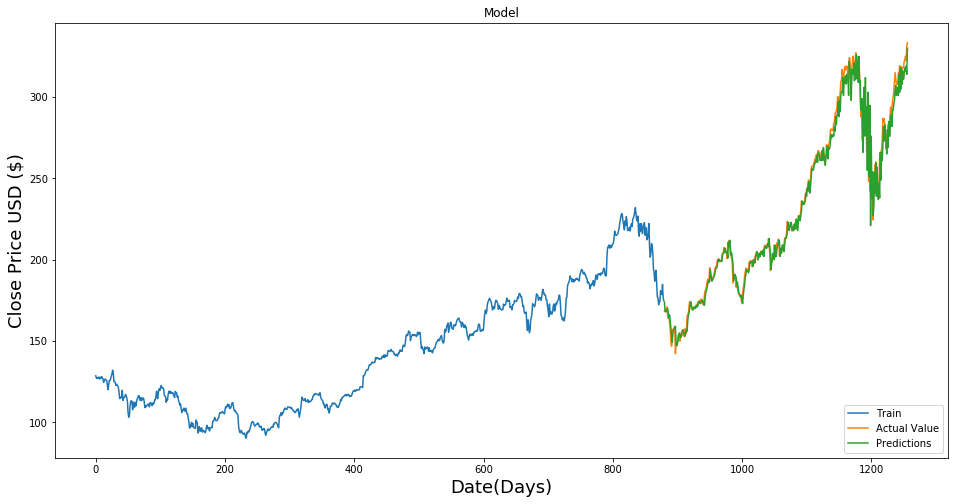

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date(Days)", fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Pred']])
plt.legend(['Train','Actual Value','Predictions'],loc='lower right')
plt.show()

#### <br>Observations: </br>
<br>1: You can observe that actual stock prices are nearly close to predicted stock price values for test data. </br>
<br>2:  At the begining of test data from date in days say around 881 actual stock price values and predicted values are matching but slowly slowly at later stage there is very very slight difference in actual and predicted values. </br>

#### Predictions for next 15 future days

In [38]:
len(test_data)

437

##### <br>Create a numpy array which will be input for future 15 days prediction of stock prices by taking past 60 days stock price values </br>
##### <br> So it will be requiring past 60 days data new numpy array will start from length of test_data (437)-60 =377 till the end and reshaping it because for each new day it will consider past 60 stock prices as single row i.e. single input  and past 60 values as columns</br> 

In [39]:
x_input=test_data[377:].reshape(1,-1) 
x_input.shape

(1, 60)

#### Converting it to list

In [40]:
temp_input=list(x_input)
temp_input

[array([0.7717588 , 0.62467094, 0.66847647, 0.64301579, 0.63524186,
        0.5713228 , 0.55129154, 0.64387957, 0.63828562, 0.6914281 ,
        0.64741691, 0.6764972 , 0.67435834, 0.61932379, 0.63585884,
        0.62138039, 0.70800428, 0.69550016, 0.72281178, 0.73070911,
        0.75234452, 0.80910661, 0.79833004, 0.80762586, 0.79162553,
        0.76748108, 0.73227213, 0.76406713, 0.75966601, 0.79232478,
        0.79314742, 0.77426785, 0.81190359, 0.83687068, 0.81741527,
        0.83423824, 0.85233629, 0.8649638 , 0.87775584, 0.90403916,
        0.92411155, 0.90930405, 0.89383843, 0.90161237, 0.89408523,
        0.92390589, 0.91641987, 0.94146923, 0.93167983, 0.94007075,
        0.93118625, 0.93686245, 0.9374383 , 0.93616321, 0.9522458 ,
        0.95837447, 0.96569595, 0.95417901, 0.99193814, 1.        ])]

In [41]:
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.7717588022375783,
 0.6246709443896019,
 0.6684764725238568,
 0.6430157946692991,
 0.6352418558736428,
 0.5713228035538007,
 0.5512915432708128,
 0.6438795656465943,
 0.6382856202698257,
 0.6914281013491281,
 0.6474169134583747,
 0.6764972030273118,
 0.6743583415597236,
 0.6193237907206319,
 0.6358588351431393,
 0.6213803882856204,
 0.7080042777229354,
 0.6955001645278054,
 0.7228117801908525,
 0.7307091148404081,
 0.7523445212240871,
 0.8091066140177692,
 0.7983300427772295,
 0.8076258637709774,
 0.7916255347153671,
 0.7674810793024023,
 0.7322721289897995,
 0.7640671273445214,
 0.7596660085554459,
 0.7923247778874631,
 0.7931474169134587,
 0.7742678512668641,
 0.8119035867061535,
 0.8368706811451136,
 0.8174152681803226,
 0.8342382362619285,
 0.8523362948338271,
 0.8649638038828564,
 0.8777558407370847,
 0.9040391576176374,
 0.924111549851925,
 0.9093040473840082,
 0.8938384336952945,
 0.9016123724909513,
 0.8940852254030931,
 0.9239058900954262,
 0.9164198749588681,
 0.94146923330

#### Predict for next 15 days

In [43]:
from numpy import array
lst_output=[] # empty list where all new value or future are added
n_steps=60
i=0
while(i<15):
    
    if(len(temp_input)>60):
        x_input=np.array(temp_input[1:]) # Ignoring the 0th row because it is the old value
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)  # Because it will give single input i.e. single row of past 60 values to predict for new future value
        x_input = x_input.reshape((1, n_steps, 1)) # # dimension for LSTM to predict
        yhat = model.predict(x_input, verbose=0) # numpy.ndarray
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist()) # add the new predicted value into temp-input
        temp_input=temp_input[1:] # Taking all values from 1 row to end 
        lst_output.extend(yhat.tolist()) # add the new predicted value into empty list
        i=i+1
    else: 
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0) # numpy.ndarray
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) # Converting numpy.ndarray to list
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # add predicted value into empty list
        i=i+1
    

print(lst_output)

[0.9497523]
61
1 day input [0.62467094 0.66847647 0.64301579 0.63524186 0.5713228  0.55129154
 0.64387957 0.63828562 0.6914281  0.64741691 0.6764972  0.67435834
 0.61932379 0.63585884 0.62138039 0.70800428 0.69550016 0.72281178
 0.73070911 0.75234452 0.80910661 0.79833004 0.80762586 0.79162553
 0.76748108 0.73227213 0.76406713 0.75966601 0.79232478 0.79314742
 0.77426785 0.81190359 0.83687068 0.81741527 0.83423824 0.85233629
 0.8649638  0.87775584 0.90403916 0.92411155 0.90930405 0.89383843
 0.90161237 0.89408523 0.92390589 0.91641987 0.94146923 0.93167983
 0.94007075 0.93118625 0.93686245 0.9374383  0.93616321 0.9522458
 0.95837447 0.96569595 0.95417901 0.99193814 1.         0.94975227]
1 day output [[0.9087309]]
2 day input [0.66847647 0.64301579 0.63524186 0.5713228  0.55129154 0.64387957
 0.63828562 0.6914281  0.64741691 0.6764972  0.67435834 0.61932379
 0.63585884 0.62138039 0.70800428 0.69550016 0.72281178 0.73070911
 0.75234452 0.80910661 0.79833004 0.80762586 0.79162553 0.76748

#####  ELSE PART

<br> At first it will go into else part because temp_input has 60 values . In else part it will first reshape it to 3 dimensions.</br>
 <br> Then it will predict for that single input in x_input (containing 60 values) where output for prediction is numpy.ndarray.</br>
<br> Put that predicted value into temp_input which now has in total 61 values. Also, put the predicted value into empty list lst_output which contains only predicted values of future 15 days </br>

##### IF PART

<br>For if part if it will enter it has values greater than 15 because we want to predict for next 15 days by considering past 60 days stock price values</br>
<br>For 1st iteration for in if part x_input will consider only last 60 values as it will make prediction for new value based on past 60 values.</br>
<br>Here again x_input is reshape so as it has single input i.e. single row of past 60 values which is then again reshape into 3 dimension for prediction by LSTM model.</br>
<br>new predicted value is added into temp_input .</br>
<br>Consider temp_input from 1st row because everytime we want to consider new value based on past 60 days values so at every iteration we are considering only past 60 values.</br>
<br>Add new predicted value into list lst_output.</br>
<br> Continue till we get 15 days future values</br>

##### Plotting for future 15 days

#### Creating numpy array of day_new and day_pred which will take values of 60 days and 15(future days) respectively

In [44]:
day_new=np.arange(1,61)
day_pred=np.arange(61,76)


#### Inversing Transform of future 15 days predicted values because converting scaled values into original values for plotting 

In [45]:
ou=sc.inverse_transform(lst_output)
ou

array([[321.24377217],
       [311.27066227],
       [309.00860449],
       [309.51247388],
       [308.96711653],
       [307.41626652],
       [305.86769162],
       [304.61083667],
       [303.45010106],
       [302.22666255],
       [300.93068168],
       [299.60345804],
       [298.27211893],
       [296.94760512],
       [295.63769833]])

#### Plotting from 1197 days till end of original stock price data which is till last day

Text(0, 0.5, 'Stock Price value in USD($)')

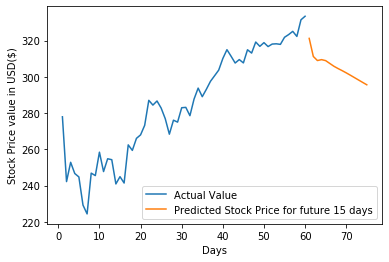

In [46]:
plt.plot(day_new,(data_train[1197:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))
plt.legend(['Actual Value','Predicted Stock Price for future 15 days'],loc='lower right')
plt.xlabel("Days")
plt.ylabel("Stock Price value in USD($)")

#### <br> Observations: </br>
<br>1.You can see that the predicted stock price values for future 15 days is low than actual stock prices values till date. </br>
<br> 2. Future values is dipping from 321 to 295 while actual stock price values was increasing till date and was around 340. </br>

#### Merging values from actual values till date and future 15 days stock price values

Text(0.5, 1.0, 'Stock Price Values of Apple in USD($) including future 15 days stock Price values')

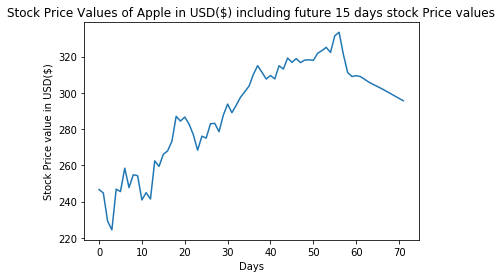

In [47]:
df3=data_train.values.tolist() # because lst_output is a list so converting data_train into list
df3.extend(sc.inverse_transform(lst_output))
plt.plot(df3[1200:])
plt.xlabel("Days")
plt.ylabel("Stock Price value in USD($)")
plt.title('Stock Price Values of Apple in USD($) including future 15 days stock Price values')

### <br> Conclusion: </br>
###### <br> 1. Stock Price values of Apple is decreasing in next 15 days </br>
###### <br> 2. Actual Stock prices till date is high comapred to new future 15 days values </br>
###### <br> 3. Not to invest in Apple stocks in next 15 days due to dipping value </br>